In [0]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
import json
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline
import sys
from tqdm import tqdm_notebook as tqdm

In [2]:
with open('/content/drive/My Drive/Transweb /Author links/nodes.json') as f:            #jason file reading
    data = json.load(f)

datan=pd.DataFrame(data)

datan=datan.fillna(0)

datan

,first,id,keyword_0,keyword_10,keyword_13,keyword_15,keyword_2,keyword_33,keyword_34,keyword_37,keyword_38,keyword_41,keyword_43,keyword_46,keyword_49,keyword_50,keyword_52,keyword_6,keyword_8,last,num_papers,venue_13,venue_281,venue_5,venue_87,keyword_1,keyword_11,keyword_17,keyword_18,keyword_26,keyword_27,keyword_29,keyword_31,keyword_36,keyword_4,keyword_40,keyword_42,keyword_48,keyword_7,venue_1,...,venue_315,venue_342,venue_299,venue_336,venue_323,venue_179,venue_260,venue_332,venue_298,venue_174,venue_338,venue_217,venue_303,venue_347,venue_297,venue_320,venue_322,venue_75,venue_177,venue_346,venue_333,venue_284,venue_337,venue_250,venue_287,venue_312,venue_345,venue_310,venue_340,venue_339,venue_266,venue_343,venue_325,venue_330,venue_302,venue_341,venue_318,venue_200,venue_168,venue_125
0,4,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,6,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9,1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1,16,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6,3,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1,24,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9,4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,145,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4080,9,4080,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4081,3,4081,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0,7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4082,6,4082,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,2,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4083,7,4083,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [3]:
text=pd.read_csv('/content/drive/My Drive/Transweb /Author links/train.txt', header=None)       #loading the train text and spliting each node
text=text[0].str.split().to_list()
print(text[1])

['1', '318', '1610', '1776', '1865', '2283', '2507', '3076', '3108', '3182', '3357', '3675', '4040']


In [4]:
a=[]
for i in text:
    a.append(int(i[0]))          # a is to get the authors in a sequence
print(a)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 22

In [0]:
lst1=[]
lst2=[]
for i in text:
    for j in range(1,len(i)):
        lst1.append(i[0])
        lst1.append(i[j])
        lst2.append(lst1)
        lst1=[]

In [6]:
lst2  # one by one comparison

[['0', '2860'],
 ['0', '3117'],
 ['1', '318'],
 ['1', '1610'],
 ['1', '1776'],
 ['1', '1865'],
 ['1', '2283'],
 ['1', '2507'],
 ['1', '3076'],
 ['1', '3108'],
 ['1', '3182'],
 ['1', '3357'],
 ['1', '3675'],
 ['1', '4040'],
 ['2', '164'],
 ['2', '413'],
 ['2', '1448'],
 ['2', '1650'],
 ['2', '3119'],
 ['2', '3238'],
 ['3', '164'],
 ['3', '172'],
 ['3', '712'],
 ['3', '849'],
 ['3', '872'],
 ['3', '983'],
 ['3', '1616'],
 ['3', '1826'],
 ['3', '1973'],
 ['3', '2118'],
 ['3', '2291'],
 ['3', '2819'],
 ['3', '2978'],
 ['3', '3238'],
 ['3', '3365'],
 ['4', '95'],
 ['4', '97'],
 ['4', '143'],
 ['4', '196'],
 ['4', '317'],
 ['4', '374'],
 ['4', '375'],
 ['4', '482'],
 ['4', '526'],
 ['4', '544'],
 ['4', '615'],
 ['4', '753'],
 ['4', '784'],
 ['4', '850'],
 ['4', '852'],
 ['4', '1023'],
 ['4', '1060'],
 ['4', '1078'],
 ['4', '1103'],
 ['4', '1106'],
 ['4', '1110'],
 ['4', '1118'],
 ['4', '1135'],
 ['4', '1178'],
 ['4', '1189'],
 ['4', '1198'],
 ['4', '1255'],
 ['4', '1277'],
 ['4', '1312'],
 [

In [0]:
new_data=pd.DataFrame(lst2, columns=['id', 'node_2'])       # getting the data in a dataframe

In [0]:
new_data=new_data.astype(int)

In [9]:
new_data

,id,node_2
0,0,2860
1,0,3117
2,1,318
3,1,1610
4,1,1776
...,...,...
53867,4084,1348
53868,4084,2101
53869,4084,2321
53870,4084,3244


In [10]:
new_data['id'].value_counts()

2119    158
1465    156
554     153
2238    149
2192    140
       ... 
1871      1
2031      1
2129      1
208       1
48        1
Name: id, Length: 4016, dtype: int64

In [11]:
'''null_nodes=[]
for i in range(4085):
  if i not in a:
    null_nodes.append(i)
from random import randint
node1=[]
for i in range(69):
  node1.append(randint(0,4085))
null_node_df=pd.DataFrame((null_nodes), columns=['node_1'])
null_node_df['node_2']=node1

#null_node_df['label']=0
#new_data['label']=1

#fake=pd.concat((new_data,null_node_df), axis=0 )
#fake

#fake.info()

#fake.sort_values(by='node_1', ascending=True, inplace=True)

#fake['label'].value_counts()

SyntaxError: ignored

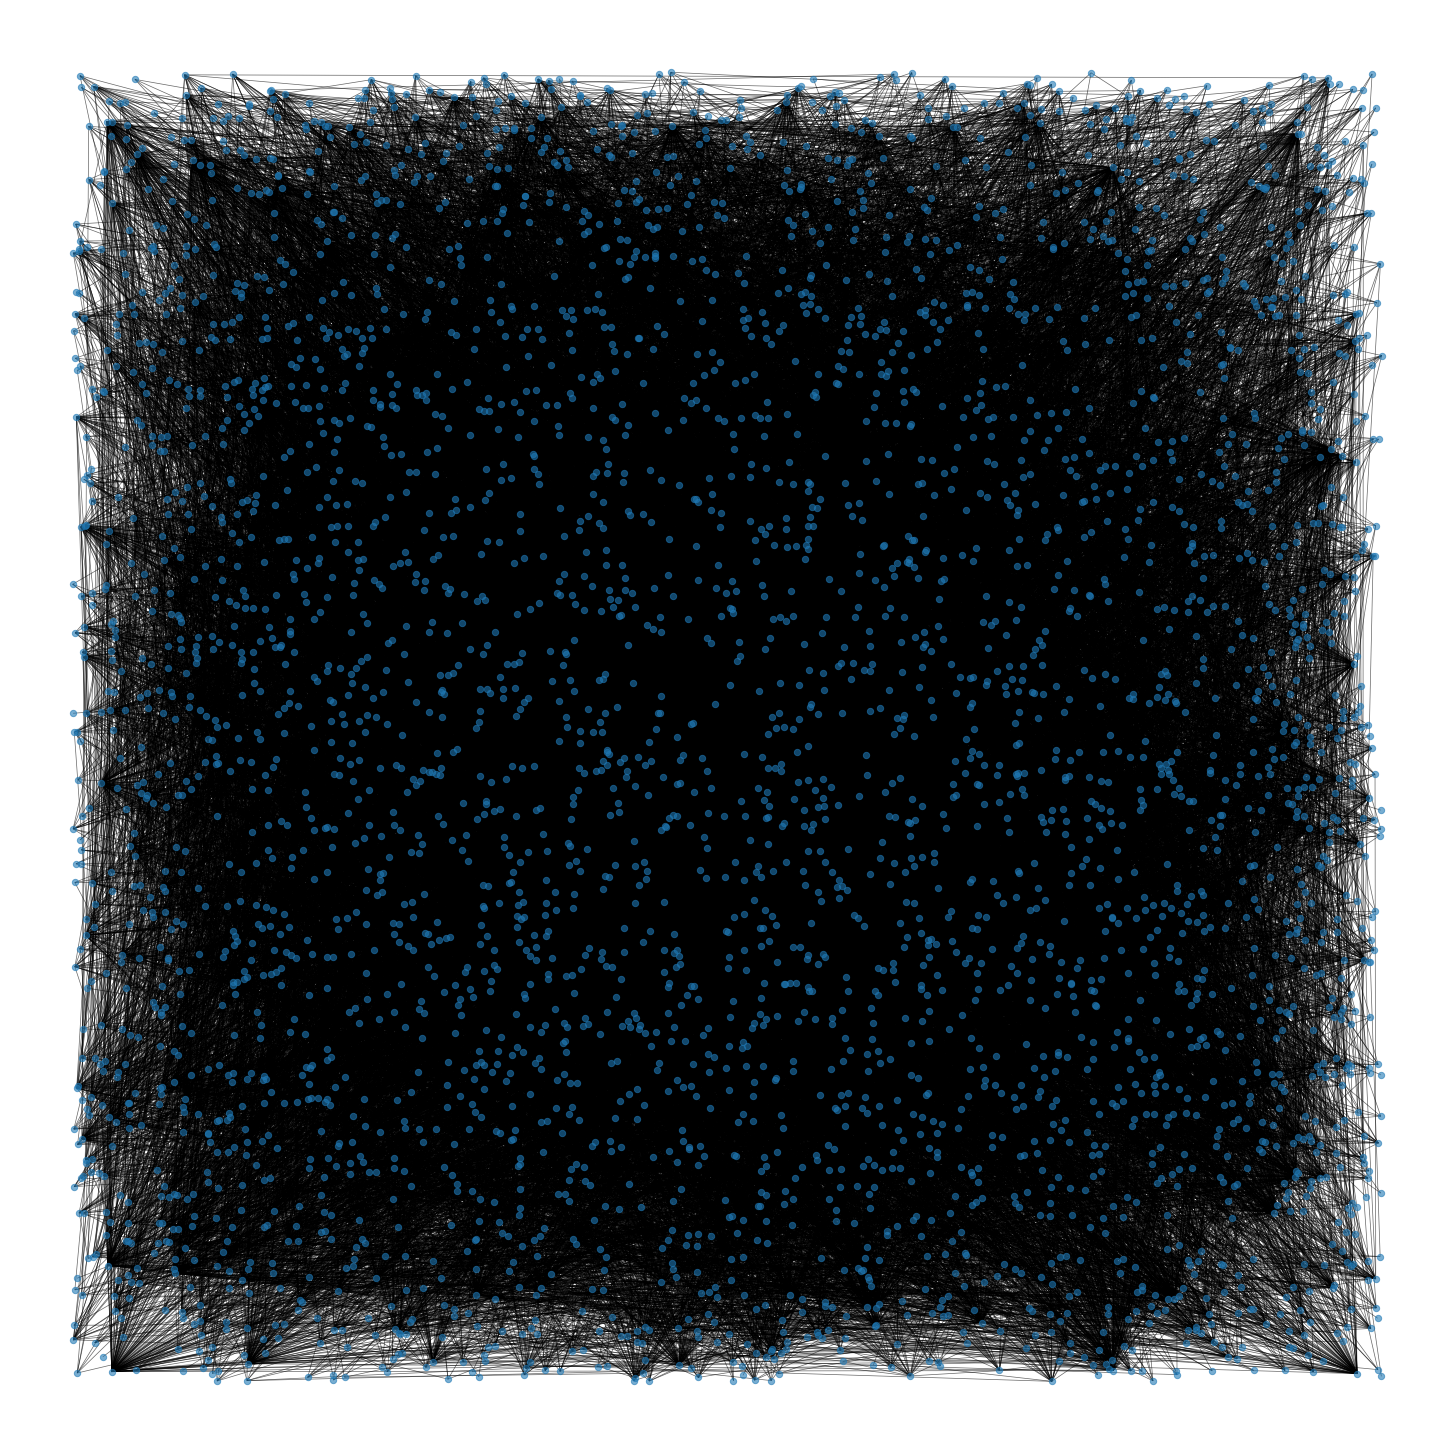

In [12]:
G = nx.from_pandas_edgelist(new_data, "id", "node_2", create_using=nx.Graph())
plt.figure(figsize=(20,20))
pos = nx.random_layout(G, seed=23)
nx.draw(G, with_labels=False,  pos = pos, node_size = 40, alpha = 0.6, width = 0.7)
plt.show()

In [0]:
'''node_list = fake['node_1'].to_list() + fake['node_2'].to_list()

node_list = list(dict.fromkeys(node_list))

adj_G = nx.to_numpy_matrix(G, nodelist = node_list)

c=0
# get unconnected node-pairs
all_unconnected_pairs = []
#no_con=[]
# traverse adjacency matrix
offset = 0
for i in tqdm(range(adj_G.shape[0])):
    for j in range(offset,adj_G.shape[1]):
        if i != j:
          try:
            if nx.shortest_path_length(G, i, j) >=6:
              if adj_G[i,j] == 0:
                all_unconnected_pairs.append([node_list[i],node_list[j]])
          except:
            print("Unexpected error:", sys.exc_info()[0])
            #no_con.append([node_list[i],node_list[j]])
    if len(all_unconnected_pairs)>54000:
      break;
    offset = offset + 1



no_con_df=pd.DataFrame((all_unconnected_pairs), columns=['node_1','node_2'])

no_con_df=no_con_df.sample(51000)

mixed=pd.concat((fake,no_con_df), axis=0)

mixed.sort_values(by='node_1', inplace=True)

mixed.reset_index(drop=True, inplace=True)

mixed=mixed.rename(columns={'node_1':'id'})

mixed=mixed.fillna(0)

In [0]:
merged=pd.merge(new_data,datan, on='id') 

In [14]:
merged

,id,node_2,first,keyword_0,keyword_10,keyword_13,keyword_15,keyword_2,keyword_33,keyword_34,keyword_37,keyword_38,keyword_41,keyword_43,keyword_46,keyword_49,keyword_50,keyword_52,keyword_6,keyword_8,last,num_papers,venue_13,venue_281,venue_5,venue_87,keyword_1,keyword_11,keyword_17,keyword_18,keyword_26,keyword_27,keyword_29,keyword_31,keyword_36,keyword_4,keyword_40,keyword_42,keyword_48,keyword_7,...,venue_315,venue_342,venue_299,venue_336,venue_323,venue_179,venue_260,venue_332,venue_298,venue_174,venue_338,venue_217,venue_303,venue_347,venue_297,venue_320,venue_322,venue_75,venue_177,venue_346,venue_333,venue_284,venue_337,venue_250,venue_287,venue_312,venue_345,venue_310,venue_340,venue_339,venue_266,venue_343,venue_325,venue_330,venue_302,venue_341,venue_318,venue_200,venue_168,venue_125
0,0,2860,4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,6,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,3117,4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,6,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,318,9,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1,16,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1610,9,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1,16,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1776,9,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1,16,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53867,4084,1348,8,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53868,4084,2101,8,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53869,4084,2321,8,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53870,4084,3244,8,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [0]:
X_train=merged.drop('node_2', axis=1)
y_train=merged['node_2']

In [0]:
import tensorflow as tf

In [0]:
y_train = tf.keras.utils.to_categorical(y_train)

In [20]:
y_train.shape

(53872, 4085)

In [29]:
X_train.shape

(53872, 405)

In [0]:
model=tf.keras.models.Sequential()

In [0]:
model.add(tf.keras.layers.Dense(512,activation='relu',input_dim=X_train.shape[1]))

In [0]:
model.add(tf.keras.layers.Dense(512, activation='relu'))

In [0]:
model.add(tf.keras.layers.Dense(512, activation='relu'))

In [0]:
#model.add(tf.keras.layers.Dense(1024, activation='relu'))

In [0]:
model.add(tf.keras.layers.Dense(4085, activation='softmax'))

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [111]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 512)               207872    
_________________________________________________________________
dense_30 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_31 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_32 (Dense)             (None, 4085)              2095605   
Total params: 2,828,789
Trainable params: 2,828,789
Non-trainable params: 0
_________________________________________________________________


In [0]:
#from sklearn.ensemble import RandomForestClassifier

In [0]:
#rfc=RandomForestClassifier(n_estimators=2000, n_jobs=-1)

In [0]:
#rfc.fit(X,y)

In [0]:
test=pd.read_csv('/content/drive/My Drive/Transweb /Author links/test-public.csv')

In [0]:
test=test.rename(columns={'Source':'id'})

In [0]:
test_merged=pd.merge(test,datan, on='id')

In [0]:
test_merged=test_merged.rename(columns={'Sink':'node_2'})
test_merged.drop('Id', axis=1, inplace=True)

In [43]:
test_merged

,id,node_2,first,keyword_0,keyword_10,keyword_13,keyword_15,keyword_2,keyword_33,keyword_34,keyword_37,keyword_38,keyword_41,keyword_43,keyword_46,keyword_49,keyword_50,keyword_52,keyword_6,keyword_8,last,num_papers,venue_13,venue_281,venue_5,venue_87,keyword_1,keyword_11,keyword_17,keyword_18,keyword_26,keyword_27,keyword_29,keyword_31,keyword_36,keyword_4,keyword_40,keyword_42,keyword_48,keyword_7,...,venue_315,venue_342,venue_299,venue_336,venue_323,venue_179,venue_260,venue_332,venue_298,venue_174,venue_338,venue_217,venue_303,venue_347,venue_297,venue_320,venue_322,venue_75,venue_177,venue_346,venue_333,venue_284,venue_337,venue_250,venue_287,venue_312,venue_345,venue_310,venue_340,venue_339,venue_266,venue_343,venue_325,venue_330,venue_302,venue_341,venue_318,venue_200,venue_168,venue_125
0,1,4021,9,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1,16,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,3795,7,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1627,6,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1,24,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,2206,9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,145,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2575,9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,145,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,3864,3970,3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0,10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,3884,3921,9,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1,12,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,3946,3956,4,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,9,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,3956,3969,9,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,12,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [0]:
y_test = tf.keras.utils.to_categorical(y_test)

In [76]:
y_test.shape

(2000, 4085)

In [112]:
model.fit(X_train,y_train,          
          validation_data=(X_test,y_test),
          epochs=20,
          batch_size=32)

Epoch 1/20
1684/1684 [==============================] - 35s 21ms/step - loss: 8.4599 - accuracy: 0.0022 - val_loss: 8.1434 - val_accuracy: 0.0010
Epoch 2/20
1684/1684 [==============================] - 37s 22ms/step - loss: 7.7932 - accuracy: 0.0026 - val_loss: 8.1227 - val_accuracy: 0.0020
Epoch 3/20
1684/1684 [==============================] - 35s 21ms/step - loss: 7.7204 - accuracy: 0.0027 - val_loss: 8.1259 - val_accuracy: 0.0035
Epoch 4/20
1684/1684 [==============================] - 34s 20ms/step - loss: 7.6696 - accuracy: 0.0029 - val_loss: 8.3156 - val_accuracy: 0.0010
Epoch 5/20
1684/1684 [==============================] - 34s 20ms/step - loss: 7.6272 - accuracy: 0.0035 - val_loss: 8.2726 - val_accuracy: 0.0010
Epoch 6/20
1684/1684 [==============================] - 34s 20ms/step - loss: 7.5463 - accuracy: 0.0038 - val_loss: 8.3603 - val_accuracy: 0.0035
Epoch 7/20
1684/1684 [==============================] - 34s 20ms/step - loss: 7.4706 - accuracy: 0.0042 - val_loss: 8.6899 -

In [0]:
pred=model.predict_proba(X_test)

In [114]:
pred.shape

(2000, 4085)

In [121]:
pred[0]

1.4934724e-15

In [0]:
lst=[]
for i,k in enumerate(test_merged['node_2']):
  lst.append(pred[i][k])

In [124]:
lst

[2.2082956e-15,
 1.9886054e-06,
 4.1416767e-28,
 3.7750857e-29,
 1.462269e-23,
 5.6404474e-07,
 4.371289e-10,
 4.7312217e-23,
 0.0,
 0.0014402973,
 9.183694e-07,
 3.4217283e-07,
 7.4016065e-22,
 1.799978e-07,
 4.1939846e-05,
 0.010220841,
 0.020644687,
 3.346698e-24,
 5.598668e-06,
 1.977659e-14,
 7.991852e-11,
 5.6994154e-06,
 7.2820053e-06,
 2.4651492e-25,
 6.408807e-17,
 5.9299928e-06,
 5.211221e-10,
 2.2719014e-19,
 1.0151943e-11,
 1.4796165e-14,
 2.4111537e-13,
 0.0006526295,
 0.0020253912,
 0.00015041057,
 2.7463618e-23,
 0.0031581384,
 0.0029108115,
 0.0026742208,
 0.00014060391,
 1.7013925e-09,
 1.5220509e-13,
 1.3910369e-21,
 8.459197e-22,
 2.9841124e-22,
 1.2767384e-06,
 0.0090054935,
 2.6592112e-05,
 6.603215e-13,
 3.469519e-23,
 7.263133e-05,
 0.0030704807,
 5.118699e-14,
 8.4733e-16,
 2.3088311e-21,
 3.4994403e-12,
 3.2213862e-14,
 0.00013957528,
 1.1444308e-25,
 1.3994524e-17,
 0.021113131,
 0.027103024,
 0.000884257,
 3.3188177e-13,
 1.6789903e-10,
 6.422722e-10,
 0.0081

In [0]:
pred=rfc.predict_proba(test_merged)

In [100]:
pred

array([[0.379, 0.621],
       [0.998, 0.002],
       [0.313, 0.687],
       ...,
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.   , 1.   ]])

In [52]:
rfc.predict(test_merged)

array([1., 0., 1., ..., 1., 1., 1.])

In [0]:
proba=[]
for i in pred:
  proba.append(i[1])

In [0]:
proba

In [103]:
test_merged

,id,node_2,first,keyword_0,keyword_10,keyword_13,keyword_15,keyword_2,keyword_33,keyword_34,keyword_37,keyword_38,keyword_41,keyword_43,keyword_46,keyword_49,keyword_50,keyword_52,keyword_6,keyword_8,last,num_papers,venue_13,venue_281,venue_5,venue_87,keyword_1,keyword_11,keyword_17,keyword_18,keyword_26,keyword_27,keyword_29,keyword_31,keyword_36,keyword_4,keyword_40,keyword_42,keyword_48,keyword_7,...,venue_315,venue_342,venue_299,venue_336,venue_323,venue_179,venue_260,venue_332,venue_298,venue_174,venue_338,venue_217,venue_303,venue_347,venue_297,venue_320,venue_322,venue_75,venue_177,venue_346,venue_333,venue_284,venue_337,venue_250,venue_287,venue_312,venue_345,venue_310,venue_340,venue_339,venue_266,venue_343,venue_325,venue_330,venue_302,venue_341,venue_318,venue_200,venue_168,venue_125
0,1,4021,9,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1,16,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,3795,7,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1627,6,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1,24,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,2206,9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,145,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2575,9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,145,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,3864,3970,3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0,10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,3884,3921,9,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1,12,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,3946,3956,4,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,9,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,3956,3969,9,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,12,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [0]:
id=test_merged.index

In [0]:
id=id+1

In [127]:
id

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000],
           dtype='int64', length=2000)

In [0]:
Ans10=pd.DataFrame(lst, columns=['Predicted'])

In [0]:
Ans10['Id']=id

In [0]:
Ans10.to_csv('Answer10.csv')